In [30]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
tfd = tfp.distributions

In [31]:
n_train = 100
dims = 1
shape = (n_train, dims)
        

In [32]:

x_train = tf.random.normal(shape)
f = lambda x: x**2
y_train = f(x_train)

In [33]:
print(y_train.shape)

(100, 1)


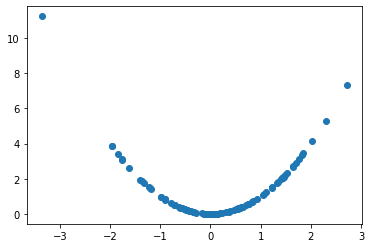

In [34]:
plt.scatter(x_train, y_train)
plt.show()

In [35]:
negloglik = lambda y, p_y: -p_y.log_prob(y)

In [36]:
#Simple model

# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)
model.fit(x_train, y_train, epochs=500, verbose=False)

# Make predictions.
x_test = tf.random.normal(shape=(100,1))
yhat = model(x_test)

2021-11-29 19:05:28.602872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [38]:
print(yhat.mean())

tf.Tensor(
[[1.1043283]
 [1.0635566]
 [1.4179837]
 [1.1830481]
 [1.1569145]
 [1.2567888]
 [1.2296968]
 [1.3713572]
 [1.289978 ]
 [1.2154061]
 [1.181587 ]
 [1.2606217]
 [1.5908313]
 [1.157128 ]
 [1.4331353]
 [1.3228846]
 [1.0665178]
 [1.19092  ]
 [1.5343508]
 [1.2164202]
 [1.2241579]
 [1.2858429]
 [1.2898455]
 [1.3344256]
 [1.4797989]
 [1.1906663]
 [1.0214868]
 [1.1871212]
 [1.2101848]
 [0.9716052]
 [1.0707626]
 [1.2478918]
 [1.2807677]
 [1.059733 ]
 [1.204186 ]
 [1.3202018]
 [1.2288674]
 [1.1191797]
 [1.1429513]
 [1.1278114]
 [1.3259187]
 [1.3150097]
 [1.2232198]
 [1.1313412]
 [1.2599548]
 [1.1742278]
 [1.3542566]
 [1.1059259]
 [1.0932294]
 [1.3890722]
 [1.180754 ]
 [1.11322  ]
 [1.0442783]
 [1.1131964]
 [1.4075476]
 [1.2971005]
 [1.1374806]
 [1.4189361]
 [1.1290207]
 [1.3234627]
 [1.1601894]
 [1.292085 ]
 [1.154124 ]
 [1.2929487]
 [1.1843439]
 [1.1589108]
 [1.191784 ]
 [1.3727214]
 [1.524752 ]
 [1.2739774]
 [1.3262631]
 [1.3286048]
 [1.4249688]
 [1.3538258]
 [1.3740311]
 [1.274293 ]
 

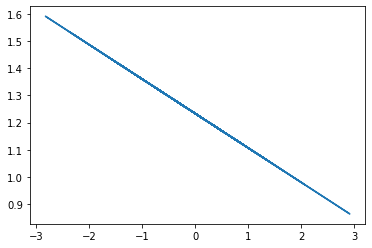

In [39]:
plt.plot(x_test, yhat.mean())
plt.show()

In [ ]:
## model.layers[0].set_weights(w_prior.sample(model.layers[0].w.shape))

In [45]:
def unnormalized_log_prob(x):
    return -x**2

In [47]:
# Target distribution is proportional to: `exp(-x (1 + x))`.
def unnormalized_log_prob(x):
    return -x - x**2.

# Initialize the HMC transition kernel.
num_results = int(10e3)
num_burnin_steps = int(1e3)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=unnormalized_log_prob,
        num_leapfrog_steps=3,
        step_size=1.),
    num_adaptation_steps=int(num_burnin_steps * 0.8))

# Run the chain (with burn-in).
@tf.function
def run_chain():
  # Run the chain (with burn-in).
    samples, is_accepted = tfp.mcmc.sample_chain(
        num_results=num_results,
        num_burnin_steps=num_burnin_steps,
        current_state=1.,
        kernel=adaptive_hmc,
        trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

    sample_mean = tf.reduce_mean(samples)
    sample_stddev = tf.math.reduce_std(samples)
    is_accepted = tf.reduce_mean(tf.cast(is_accepted, dtype=tf.float32))
    return sample_mean, sample_stddev, is_accepted


In [ ]:
sample_mean, sample_stddev, is_accepted = run_chain()

2021-11-26 19:11:24.249306: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-26 19:11:24.261432: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-26 19:11:24.263080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [24]:
def f(L, a=0.89, b=2.26):
    return a*(1./L) + b

In [25]:
def g(x, a=0.89, b=2.26):
    return a*x + b

In [29]:
L = np.array([40, 60, 80, 100])
x = 1./L

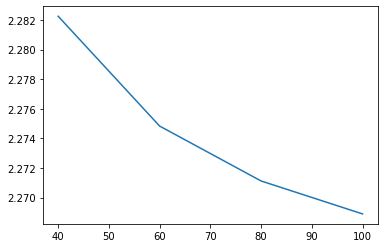

In [30]:
plt.plot(L, f(L))

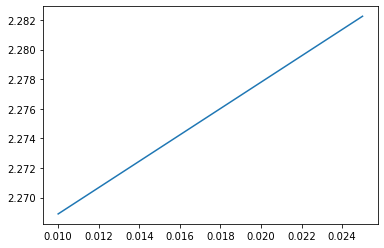

In [31]:
plt.plot(x, f(L))